### Import packages

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [76]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Ligue_1_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [77]:
Premier_matches.tail(5)

,match_general_info,team_details,event_details
1708,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'LOSC Lille', 'rank': '5', '...","{'home': {'goal': [{'scorer': 'Yusuf Yazici', ..."
1709,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'Le Havre AC', 'rank': '10',...","{'home': {'goal': [{'scorer': 'Daler Kuzyaev',..."
1710,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'FC Metz', 'rank': '13', 'st...","{'home': {'goal': [{'scorer': 'Cheikh Sabaly',..."
1711,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'OGC Nice', 'rank': '8', 'st...","{'home': {'goal': [{'scorer': 'Youcef Atal', '..."
1712,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'Olympique Lyon', 'rank': '1...",{'home': {'goal': [{'scorer': 'Corentin Toliss...


In [78]:
print('number of matches from season 2010/2011 to the date the data scraped:', len(Premier_matches))

number of matches from season 2010/2011 to the date the data scraped: 4881


### Match general information analysis
#### Observe initial form

In [79]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [80]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Sat,8/7/10,9:00 PM,Stade de l'Abbé-Deschamps,8.958,Bruno Coué,2:2
1,Sat,8/7/10,9:00 PM,Stade Bollaert-Delelis,31.392,Ruddy Buquet,1:2
2,Sat,8/7/10,9:00 PM,Stade de Gerland,35.275,Lionel Jaffredo,0:0
3,Sat,8/7/10,9:00 PM,Orange Vélodrome,55.790,Alexandre Castro,1:2
4,Sat,8/7/10,9:00 PM,Stade du Ray,7.833,Laurent Duhamel,0:0


In [81]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 335
referee 0
score 0


Attendance data need to be observed after converting string-type date to date-type date to check why many null values exist.

#### Data pre-processing

In [82]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [83]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Sat,2010-08-07,21:00:00,Stade de l'Abbé-Deschamps,8.958,Bruno Coué,2:2,2,2
1,Sat,2010-08-07,21:00:00,Stade Bollaert-Delelis,31.392,Ruddy Buquet,1:2,1,2
2,Sat,2010-08-07,21:00:00,Stade de Gerland,35.275,Lionel Jaffredo,0:0,0,0
3,Sat,2010-08-07,21:00:00,Orange Vélodrome,55.790,Alexandre Castro,1:2,1,2
4,Sat,2010-08-07,21:00:00,Stade du Ray,7.833,Laurent Duhamel,0:0,0,0


In [84]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
928,Wed,2012-12-12,21:00:00,Stade Armand-Cesari,None,Said Ennjimi,1:2,1,2
1153,Sat,2013-08-17,20:00:00,Stade du Ray,None,Antony Gautier,2:1,2,1
1160,Fri,2013-08-23,20:30:00,Stade Louis-II,None,Philippe Kalt,0:0,0,0
1293,Wed,2013-12-04,19:00:00,Stade François-Coty,None,Alexandre Castro,1:1,1,1
1801,Fri,2015-03-13,20:30:00,Allianz Riviera,None,Benoît Millot,1:2,1,2
...,...,...,...,...,...,...,...,...,...
4234,Sun,2021-11-28,20:45:00,Orange Vélodrome,None,Jérémie Pignard,1:0,1,0
4241,Wed,2021-12-01,21:00:00,Groupama Stadium,None,Benoît Millot,1:2,1,2
4275,Fri,2022-01-07,21:00:00,Matmut Atlantique,None,Eric Wattellier,0:1,0,1
4284,Wed,2022-01-26,19:00:00,Stade Raymond Kopa,None,Clément Turpin,0:1,0,1


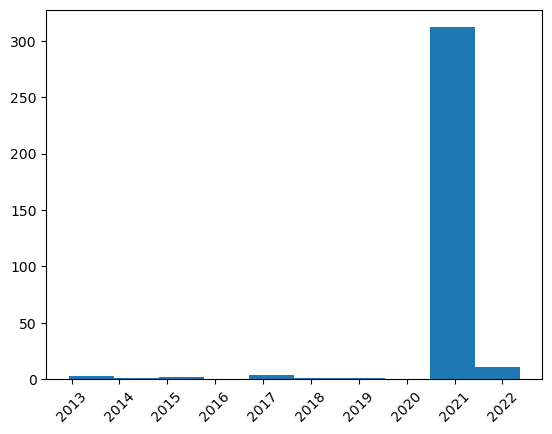

In [85]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most null cases for attendance were located in the season 2020-2021, possibly because of the pandemic. <br>
There were many games without game spectators during the pandemic(between 05.01.2020 and 07.01.2021), so 0 will replace null values for attendance. <br>

For other cases, the average attendance for the stadium will replace null values.

In [86]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')

print('Date and stadium of a game with null attendance. (Not pandemic season)')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

Date and stadium of a game with null attendance. (Not pandemic season)


,date,stadium
928,2012-12-12,Stade Armand-Cesari
1153,2013-08-17,Stade du Ray
1160,2013-08-23,Stade Louis-II
1293,2013-12-04,Stade François-Coty
1801,2015-03-13,Allianz Riviera
1813,2015-03-21,Stade Armand-Cesari
2439,2017-04-05,Stade Saint-Symphorien
2618,2017-04-23,Stade Geoffroy-Guichard
2623,2017-04-29,Stade Parsemain
2644,2017-05-14,Stade Parsemain


In [87]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(15000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

cannot find an average, missing value filled out manually: Stade Parsemain


In [88]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2012-12-12 12100
2013-08-17 9408
2013-08-23 7166
2013-12-04 6737
2015-03-13 18916
2015-03-21 12100
2017-04-05 13965
2017-04-23 24599
2017-04-29 15000
2017-05-14 15000
2018-04-01 31806
2019-02-05 43844
2021-08-28 18916
2021-09-19 18916
2021-09-22 25535
2021-10-01 25535
2021-11-07 24599
2022-02-01 38249
2021-11-28 43844
2021-12-01 38249
2022-01-07 20789
2022-01-26 9554
2022-05-14 24599


As we can see above, missing attendance of matches after 07.01.2021 (no pandemic period) were filled with averages.

In [89]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### Data Quality Check - Check if there are inappropriate values
##### categorical data

In [90]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4881,4881,4881,4881,4881
unique,7,29,45,69,49
top,Sat,20:00:00,Orange Vélodrome,Ruddy Buquet,1:1
freq,2205,1122,244,260,653


In [91]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4881
mean,2016-12-27 04:15:29.317762816
min,2010-08-07 00:00:00
25%,2013-10-04 00:00:00
50%,2016-12-10 00:00:00
75%,2020-02-08 00:00:00
max,2023-09-03 00:00:00


In [92]:
match_general_info['day'].value_counts(dropna=False)

Sat    2205
Sun    1808
Wed     380
Fri     377
Tue      80
Thu      16
Mon      15
Name: day, dtype: int64

In [93]:
match_general_info['date'].value_counts(dropna=False)

2022-05-21    10
2012-05-13    10
2017-05-20    10
2017-12-20    10
2023-01-11    10
              ..
2012-05-10     1
2020-11-21     1
2018-09-28     1
2012-05-01     1
2017-03-03     1
Name: date, Length: 1352, dtype: int64

In [94]:
match_general_info['starttime'].value_counts(dropna=False)

20:00:00    1122
21:00:00    1019
17:00:00     804
19:00:00     647
15:00:00     532
20:45:00     221
14:00:00     133
20:30:00     120
13:00:00     103
17:05:00      59
17:30:00      27
18:30:00      23
20:50:00      20
21:05:00      15
16:30:00       6
16:00:00       6
19:30:00       4
14:30:00       3
17:15:00       3
21:15:00       3
18:45:00       2
18:00:00       2
18:55:00       1
17:10:00       1
15:05:00       1
16:45:00       1
00:00:00       1
13:30:00       1
12:45:00       1
Name: starttime, dtype: int64

In [95]:
match_general_info['stadium'].value_counts(dropna=False)

Orange Vélodrome                       244
Parc des Princes                       244
Roazhon Park                           244
Stade de la Mosson                     240
Stade Geoffroy-Guichard                224
Matmut Atlantique                      219
Decathlon Arena-Stade Pierre-Mauroy    208
Stade Louis-II                         206
Stadium Municipal                      206
Stade du Moustoir                      192
Stade de la Beaujoire                  188
Allianz Riviera                        186
Stade Auguste-Delaune                  167
Stade Raymond Kopa                     149
Groupama Stadium                       139
Stade Michel-d'Ornano                  131
Stade Francis-Le Blé                   130
Stade du Roudourou                     115
Stade Saint-Symphorien                 111
Stade de la Meinau                     110
Stade Gaston-Gérard                    109
Stade de Gerland                       104
Stade de l'Aube                         95
Stade Arman

In [96]:
match_general_info['referee'].value_counts(dropna=False)

Ruddy Buquet        260
Clément Turpin      234
Benoît Bastien      226
Benoît Millot       224
Antony Gautier      222
                   ... 
Alban Hung            1
Romain Delpech        1
Alejandro Castro      1
Bastien Courbet       1
Miguel Nogueira       1
Name: referee, Length: 69, dtype: int64

##### numerical data


In [97]:
match_general_info.describe()

,attendance,home_score,away_score
count,4881.000000,4881.000000,4881.000000
mean,19780.719320,1.466503,1.125794
std,13375.484927,1.244230,1.106312
min,0.000000,0.000000,0.000000
25%,11249.000000,1.000000,0.000000
50%,15912.000000,1.000000,1.000000
75%,26686.000000,2.000000,2.000000
max,70785.000000,9.000000,9.000000


### Home/Away Team Details Analysis

#### Data pre-processing

In [98]:
team_details = pd.DataFrame(Premier_matches['team_details'].to_list())
home_team_details = pd.DataFrame(team_details['home'].to_list())
away_team_details = pd.DataFrame(team_details['away'].to_list())

In [99]:
home_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,AJ Auxerre,7,"[Olivier Sorin, Jean-Pascal Mignot, Adama Coul...","[Rémy Riou, Stéphane Grichting, Dariusz Dudka,...",Jean Fernandez
1,RC Lens,16,"[Hamdi Kasraoui, Alaeddine Yahia, Romain Sartr...","[Samuel Atrous, Henri Bedimo, Geoffrey Doumeng...",Jean-Guy Wallemme
2,Olympique Lyon,13,"[Hugo Lloris, Cris, Jérémy Toulalan, Aly Cisso...","[Rémy Vercoutre, Dejan Lovren, Jérémy Pied, Je...",Claude Puel
3,Olympique Marseille,15,"[Steve Mandanda, Leyti N'Diaye, Stéphane Mbia,...","[Andrade, Hilton, Benoît Cheyrou, Fabrice Abri...",Didier Deschamps
4,OGC Nice,12,"[David Ospina, Renato Civelli, Nemanja Pejcino...","[Lionel Létizi, Jonathan Quartey, Alain Cantar...",Éric Roy


In [100]:
away_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,FC Lorient,8,"[Lionel Cappone, Bruno Ecuele Manga, Grégory B...","[Benjamin Lecomte, Lamine Koné, Sebastián Duba...",Christian Gourcuff
1,AS Nancy-Lorraine,4,"[Damien Grégorini, Joël Sami, André Luiz, Reyn...","[Rémi Pillot, Jordan Lotiès, Samba Diakité, Al...",Pablo Correa
2,AS Monaco,11,"[Stéphane Ruffier, Cédric Mongongu, Petter Han...","[Sébastien Chabbert, Djimi Traoré, Nicolas N'K...",Guy Lacombe
3,SM Caen,5,"[Alexis Thébaux, Thomas Heurtaux, Jérémy Sorbo...","[Damien Perquis, Alexandre Raineau, Sambou Yat...",Patrice Garande
4,Valenciennes FC,14,"[Nicolas Penneteau, Bobo Balde, Benjamin Angou...","[Grégory Wimbée, Nicolas Pallois, José Saez, T...",Philippe Montanier


In [101]:
for column in home_team_details.columns:

    print('home', column, home_team_details[column].isnull().sum())

for column in away_team_details.columns:

    print('away', column, away_team_details[column].isnull().sum())


home name 0
home rank 0
home starting_line_up 0
home substitutes 0
home manager 0
away name 0
away rank 0
away starting_line_up 0
away substitutes 0
away manager 0


In [102]:
concat_team_details = pd.concat([home_team_details, away_team_details], axis=0)

In [103]:
concat_team_details = concat_team_details.reset_index()

#### Team name, rank and manager analysis

In [104]:
concat_team_details[['name', 'rank', 'manager']].describe()

,name,rank,manager
count,9762,9762,9762
unique,36,20,151
top,LOSC Lille,17,Christophe Galtier
freq,489,489,465


In [105]:
concat_team_details['name'].value_counts()

LOSC Lille                  489
Olympique Lyon              489
Montpellier HSC             489
OGC Nice                    488
Olympique Marseille         487
Paris Saint-Germain         487
Stade Rennais FC            487
AS Saint-Étienne            447
FC Girondins Bordeaux       447
FC Toulouse                 413
AS Monaco                   412
FC Lorient                  384
FC Nantes                   374
Stade Reims                 337
Angers SCO                  295
SM Caen                     267
Stade Brestois 29           260
EA Guingamp                 229
FC Metz                     222
RC Strasbourg Alsace        222
Dijon FCO                   219
RC Lens                     194
ESTAC Troyes                190
SC Bastia                   190
AC Ajaccio                  152
FC Évian Thonon Gaillard    152
AS Nancy-Lorraine           152
FC Sochaux-Montbéliard      152
Valenciennes FC             152
AJ Auxerre                  114
Amiens SC                   105
Nîmes Ol

In [106]:
team_rank_list = []
for team_name in set(concat_team_details['name'].values):
    
    team_rank_list.append(pd.concat([pd.Series({'name':team_name}), pd.to_numeric(concat_team_details[concat_team_details['name']==team_name]['rank']).describe()]))

team_rank_list_df = pd.DataFrame(team_rank_list)

In [107]:
team_rank_list_df.sort_values(by='mean')

,name,count,mean,std,min,25%,50%,75%,max
32,Paris Saint-Germain,487.0,2.121150,2.214734,1.0,1.00,1.0,2.00,15.0
26,Olympique Marseille,487.0,5.453799,3.881663,1.0,3.00,4.0,6.00,20.0
16,Olympique Lyon,489.0,5.574642,3.700777,1.0,3.00,4.0,8.00,19.0
24,AS Monaco,412.0,7.368932,5.943350,1.0,2.00,5.0,11.25,20.0
12,Stade Rennais FC,487.0,7.540041,3.850330,1.0,5.00,7.0,10.00,19.0
29,LOSC Lille,489.0,7.627812,5.398516,1.0,3.00,6.0,12.00,20.0
35,AS Saint-Étienne,447.0,8.340045,4.864605,1.0,5.00,7.0,11.00,20.0
10,OGC Nice,488.0,9.502049,4.809726,1.0,5.00,9.0,13.00,20.0
9,Montpellier HSC,489.0,9.593047,4.439488,1.0,6.00,9.0,13.00,20.0
21,FC Girondins Bordeaux,447.0,10.183445,4.325583,1.0,7.00,9.0,13.00,20.0


In [108]:
concat_team_details['manager'].value_counts()

Christophe Galtier     465
Michel Der Zakarian    325
Antoine Kombouaré      299
Rudi Garcia            277
Claude Puel            265
                      ... 
Olivier Tingry           1
Philippe Mao             1
José Pinot               1
Philippe Bizeul          1
Jaroslav Plasil          1
Name: manager, Length: 151, dtype: int64

In [109]:
manager_rank_list = []
for manager_name in set(concat_team_details['manager'].values):
    
    manager_rank_list.append(pd.concat([pd.Series({'manager':manager_name}), pd.to_numeric(concat_team_details[concat_team_details['manager']==manager_name]['rank']).describe()]))

manager_rank_list_df = pd.DataFrame(manager_rank_list)

In [110]:
manager_rank_list_df.sort_values(by='mean').head(30)

,manager,count,mean,std,min,25%,50%,75%,max
57,Adi Hütter,4.0,1.250000,0.500000,1.0,1.00,1.0,1.25,2.0
90,Mauricio Pochettino,59.0,1.457627,0.726874,1.0,1.00,1.0,2.00,4.0
72,Thomas Tuchel,82.0,1.817073,2.429896,1.0,1.00,1.0,1.00,15.0
68,Unai Emery,76.0,1.947368,1.284728,1.0,1.00,2.0,2.25,8.0
20,Carlo Ancelotti,57.0,2.140351,2.333289,1.0,1.00,1.0,2.00,12.0
99,Igor Tudor,38.0,2.763158,0.852158,2.0,2.00,3.0,3.00,5.0
88,Élie Baup,55.0,2.800000,1.061097,1.0,2.00,3.0,3.50,6.0
145,Jorge Sampaoli,47.0,3.340426,1.478492,2.0,2.00,3.0,5.00,6.0
54,Laurent Blanc,146.0,3.534247,3.795032,1.0,1.00,1.0,6.00,18.0
101,Marcelino,4.0,4.250000,2.061553,2.0,2.75,4.5,6.00,6.0


####  Home/Away starting lineup analysis

In [111]:
concat_team_details['starting_line_up'].describe()

count                                                  9762
unique                                                 9086
top       [Mickaël Landreau, Aurélien Chedjou, Adil Rami...
freq                                                     11
Name: starting_line_up, dtype: object

In [112]:
players_start_lineup = []
for line_up in concat_team_details['starting_line_up']:

    for player in line_up:

        players_start_lineup.append(player)

players_start_lineup_df = pd.DataFrame({'player_name': players_start_lineup})       

In [113]:
len(players_start_lineup_df)

107382

In [114]:
players_start_lineup_df.describe()

,player_name
count,107382
unique,2364
top,Benoît Costil
freq,403


In [115]:
players_start_lineup_df.value_counts().head(60)

player_name              
Benoît Costil                403
Steve Mandanda               399
Benjamin André               356
Stéphane Ruffier             350
Daniel Congré                349
Anthony Lopes                349
Hilton                       321
Dimitri Payet                304
Jérémy Morel                 300
Ryad Boudebouz               282
Thomas Mangani               270
Benjamin Lecomte             269
Loïc Perrin                  262
Romain Hamouma               261
Julien Féret                 254
Jérémy Sorbon                251
Wissam Ben Yedder            250
Nicolas Pallois              247
Marquinhos                   244
Maxime Gonalons              240
Adrien Thomasson             239
Alban Lafont                 239
Ismaël Traoré                237
Marco Verratti               234
Sébastien Corchia            234
Damien Da Silva              234
Nolan Roux                   231
Alaixys Romao                231
Kévin Monnet-Paquet          231
Wahbi Khazri     

### Match events analysis - substitution, cards, goal(assists)

#### subsitution (in/out)

In [116]:
event_type = []
for i in range(100):
    keys = list(Premier_matches['event_details'].iloc[i]['home'].keys())
    
    for j in keys:
        event_type.append(j)


print("Categories of events:")
set(event_type)



Categories of events:


{'card', 'goal', 'sub'}

In [117]:
home_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            home_subs_list.append(one_sub)


away_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            away_subs_list.append(one_sub)

concat_subs_df = pd.concat([pd.DataFrame(home_subs_list), pd.DataFrame(away_subs_list)]).reset_index()

In [118]:
# null values of subs_in could be nobody replace subs out player. 
# (red card or injured but no more subs chances?)
for column in concat_subs_df.columns:
    print(column, concat_subs_df[column].isnull().sum())

index 0
subs_in 14
subs_out 0
subs_out_reason 0
time 0


In [119]:
concat_subs_df[['subs_in', 'subs_out', 'subs_out_reason']].describe()

,subs_in,subs_out,subs_out_reason
count,30554,30568,30568
unique,2435,2115,9
top,Souleymane Camara,Wissam Ben Yedder,Tactical
freq,142,137,13893


In [120]:
concat_subs_df['time'].describe()

count    30568.000000
mean        70.396984
std         14.540028
min          3.000000
25%         63.000000
50%         73.000000
75%         81.000000
max         94.000000
Name: time, dtype: float64

In [121]:
concat_subs_df['subs_in'].value_counts().head(50)

Souleymane Camara           142
Valère Germain              134
Jimmy Briand                 95
Frédéric Sammaritano         91
Marcus Coco                  90
Romain Hamouma               87
Jordan Ferri                 84
Paul Lasne                   82
Gilles Sunu                  81
Maxwel Cornet                80
Pierrick Capelle             79
Wesley Saïd                  78
Mathieu Bodmer               76
Ignatius Ganago              75
Nicolas de Préville          75
Kévin Monnet-Paquet          74
Corentin Jean                73
Adrien Regattin              72
Junior Sambia                72
Saîf-Eddine Khaoui           71
Arnaud Nordin                69
Gaëtan Charbonnier           66
Lucas Ocampos                65
Adrien Hunou                 65
Nolan Roux                   65
Sloan Privat                 64
Romain Del Castillo          63
Jérémy Pied                  63
Thomas Mangani               62
Jordan Ayew                  62
Clinton N'Jie                60
Stéphane

In [122]:
concat_subs_df['subs_out'].value_counts().head(50)

Wissam Ben Yedder        137
Dimitri Payet            137
Florian Thauvin          133
Romain Hamouma           132
Adrien Thomasson         120
Wahbi Khazri             117
Valère Germain           115
Nolan Roux               114
Étienne Didot            111
Nicolas de Préville      110
Florent Balmont          105
Marco Verratti           102
Rony Lopes               101
Ángel Di María            98
Fabien Lemoine            96
Gaëtan Laborde            96
Kévin Monnet-Paquet       96
Mathieu Dossevi           94
Jordan Ferri              94
Benjamin Bourigeaud       93
Marcus Coco               92
Mathieu Valbuena          91
Thomas Mangani            91
Jonathan Ikoné            91
Benjamin André            90
Angelo Fulgini            87
Martin Terrier            87
Florent Mollet            86
Ryad Boudebouz            85
Ludovic Blas              85
Mevlüt Erdinc             84
Pierrick Capelle          81
Arnaud Nordin             79
Stéphane Bahoken          78
Yann Jouffre  

#### Card

In [123]:
home_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            home_cards_list.append(one_cards)


away_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            away_cards_list.append(one_cards)

concat_cards_df = pd.concat([pd.DataFrame(home_cards_list), pd.DataFrame(away_cards_list)]).reset_index()

In [124]:
# null value of reasons -> reason not specified.
for column in concat_cards_df.columns:
    print(column, concat_cards_df[column].isnull().sum())

index 0
name 0
card_type 0
reason 10458
time 0


In [125]:
concat_cards_df[['name', 'card_type', 'reason']].describe()

,name,card_type,reason
count,18255,18255,7797
unique,1996,4,16
top,Benjamin André,Yellow card,Foul
freq,95,17099,6140


In [126]:
concat_cards_df['time'].describe()

count    18255.000000
mean        56.230184
std         24.473598
min          1.000000
25%         37.000000
50%         58.000000
75%         78.000000
max         95.000000
Name: time, dtype: float64

In [127]:
concat_cards_df['name'].value_counts().head(50)

Benjamin André         95
Marco Verratti         94
Yannick Cahuzac        77
Alaixys Romao          69
Wahbi Khazri           67
Nicolas Pallois        67
Alexander Djiku        62
Jordan Ferri           60
Romain Hamouma         58
Younousse Sankharé     57
Fabien Lemoine         54
Florent Balmont        52
Mustapha Diallo        51
Dante                  49
Maxime Gonalons        48
Hamari Traoré          47
Mehdi Mostefa          46
Thomas Mangani         46
Thiago Motta           45
Wesley Lautoa          45
Dimitri Payet          45
Damien Da Silva        44
Adrien Thomasson       44
Jonas Martin           44
Daniel Congré          43
Pedro Mendes           43
Presnel Kimpembe       43
Julian Palmieri        43
Vincent Pajot          43
Sambou Yatabaré        42
Andrei Girotto         42
Romain Thomas          42
Frédéric Guilbert      42
Nicolas de Préville    42
Renaud Cohade          41
Jordan Amavi           41
Hilton                 41
Djibril Sidibé         41
Mathieu Debu

In [128]:
# 1 Yellow card -> Yellow card
concat_cards_df['card_type'].value_counts()

Yellow card      17099
Red card           555
Second yellow      434
1 Yellow card      167
Name: card_type, dtype: int64

#### Goal (assist)

In [129]:
home_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            home_goals_list.append(one_goals)


away_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            away_goals_list.append(one_goals)

concat_goals_df = pd.concat([pd.DataFrame(home_goals_list), pd.DataFrame(away_goals_list)]).reset_index()

In [130]:
concat_goals_df.head()

,index,scorer,goal_type,assister,assist_type,time
0,0,Benoît Pedretti,Left-footed shot,Valter Birsa,Pass,20
1,1,Anthony Le Tallec,Right-footed shot,Benoît Pedretti,Pass,58
2,2,Toifilou Maoulida,Right-footed shot,Razak Boukari,Header,72
3,3,Mamadou Samassa,Right-footed shot,Hatem Ben Arfa,Pass,77
4,4,Mevlüt Erdinc,Right-footed shot,Guillaume Hoarau,Pass,5


In [131]:
print(len(concat_goals_df), len(concat_goals_df.drop_duplicates()))

12653 12653


In [132]:
# null value of assisters: solo goal
# null value of assist type: solo goal
for column in concat_goals_df.columns:
    print(column, concat_goals_df[column].isnull().sum())

index 0
scorer 0
goal_type 0
assister 3120
assist_type 3120
time 0


Null values of assister and assis_type are from solo goal.

In [133]:
concat_goals_df[['scorer', 'goal_type', 'assister', 'assist_type']].describe()

,scorer,goal_type,assister,assist_type
count,12653,12653,9533,9533
unique,1533,38,1493,11
top,Kylian Mbappé,Right-footed shot,Dimitri Payet,Pass
freq,169,4575,111,4521


In [134]:
concat_goals_df[['time']].describe()

,time
count,12653.000000
mean,50.805026
std,26.609386
min,1.000000
25%,28.000000
50%,52.000000
75%,74.000000
max,96.000000


##### scorer

In [135]:
concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts()
own_goal_df = concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts().reset_index()

own_goal_df.columns = ['scorer', 'num_own_goal']

In [136]:
own_goal_df

,scorer,num_own_goal
0,Damien Da Silva,5
1,Marcelo,4
2,Anthony Lopes,4
3,Anthony Weber,4
4,Nicolas Pallois,4
...,...,...
305,Ngonda Muzinga,1
306,Gautier Lloris,1
307,Bakaye Dibassy,1
308,Gabriel Magalhães,1


In [137]:
# record here could be wrong because it include also own goal.
# also updatad record is not added
concat_goals_df['scorer'].value_counts().head(50)
total_goal_df = concat_goals_df['scorer'].value_counts().reset_index()

total_goal_df.columns = ['scorer', 'num_goals']

In [138]:
total_goal_df

,scorer,num_goals
0,Kylian Mbappé,169
1,Wissam Ben Yedder,149
2,Edinson Cavani,138
3,Alexandre Lacazette,128
4,Zlatan Ibrahimović,113
...,...,...
1528,Julian Jeanvier,1
1529,Théo Sainte-Luce,1
1530,Akim Zedadka,1
1531,Giulian Biancone,1


In [139]:
# merge own goal and total goal dataframe to calculata net goal (total goal - own goal)
net_goal_df = own_goal_df.merge(total_goal_df, on='scorer', how='outer')

net_goal_df.sort_values(by="num_goals", ascending=0).head()

,scorer,num_own_goal,num_goals
310,Kylian Mbappé,NaN,169
311,Wissam Ben Yedder,NaN,149
312,Edinson Cavani,NaN,138
313,Alexandre Lacazette,NaN,128
314,Zlatan Ibrahimović,NaN,113


In [140]:
net_goal_df = net_goal_df.fillna(0)

In [141]:
net_goal_df['net_goal']  = net_goal_df['num_goals'] - net_goal_df['num_own_goal']

In [142]:
net_goal_df.sort_values(by="num_goals", ascending=0).head(30)

,scorer,num_own_goal,num_goals,net_goal
310,Kylian Mbappé,0.0,169,169.0
311,Wissam Ben Yedder,0.0,149,149.0
312,Edinson Cavani,0.0,138,138.0
313,Alexandre Lacazette,0.0,128,128.0
314,Zlatan Ibrahimović,0.0,113,113.0
315,Dimitri Payet,0.0,91,91.0
316,Florian Thauvin,0.0,86,86.0
317,Andy Delort,0.0,85,85.0
318,Neymar,0.0,82,82.0
192,Nolan Roux,1.0,74,73.0


In [143]:
# If there is {}goal of season in goal type -> goal type doe not specified.
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4575
Left-footed shot          2577
Header                    1955
Penalty                   1179
Own-goal                   394
Tap-in                     338
Direct free kick           317
1. Goal of the Season      207
Long distance kick         153
Counter attack goal        149
2. Goal of the Season      148
Deflected shot on goal     103
3. Goal of the Season       97
4. Goal of the Season       94
Solo run                    85
5. Goal of the Season       59
6. Goal of the Season       49
7. Goal of the Season       29
8. Goal of the Season       27
9. Goal of the Season       23
Penalty rebound             18
Chest                       13
10. Goal of the Season      12
11. Goal of the Season      11
12. Goal of the Season      10
13. Goal of the Season       8
Direct corner                6
15. Goal of the Season       4
14. Goal of the Season       3
16. Goal of the Season       2
23. Goal of the Season       1
27. Goal of the Season       1
28. Goal

In [144]:
def replace_non_specified_goal_type(sample):

    if len(sample.split('. '))>1 and sample.split('. ')[1] == 'Goal of the Season':
        sample = None

    return sample

In [145]:
concat_goals_df['goal_type'] = concat_goals_df['goal_type'].apply(lambda x: replace_non_specified_goal_type(x))

In [146]:
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4575
Left-footed shot          2577
Header                    1955
Penalty                   1179
Own-goal                   394
Tap-in                     338
Direct free kick           317
Long distance kick         153
Counter attack goal        149
Deflected shot on goal     103
Solo run                    85
Penalty rebound             18
Chest                       13
Direct corner                6
Name: goal_type, dtype: int64

In [147]:
concat_goals_df['goal_type'].isnull().sum()

791